<a href="https://colab.research.google.com/github/eriosta/neuro/blob/main/Tuning_Parameters_for_Dictionary_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install -q nilearn nibabel

In [2]:
from nilearn import datasets
from nilearn.decomposition import DictLearning
from nilearn import plotting
from nilearn.image import index_img
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map, find_xyz_cut_coords
import matplotlib.pyplot as plt
import numpy as np
import os
from nilearn.masking import compute_epi_mask
import numpy as np

/usr/local/lib/python3.10/dist-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [17]:
# Load fMRI data for only one subject
adhd_dataset = datasets.fetch_adhd(n_subjects=1)
func_filenames = adhd_dataset.func  # list of 4D nifti file for the subject

In [29]:
print(adhd_dataset.description)

ADHD 200


Notes
-----
Part of the 1000 Functional Connectome Project. Phenotypic
information includes: diagnostic status, dimensional ADHD symptom measures,
age, sex, intelligence quotient (IQ) and lifetime medication status.
Preliminary quality control assessments (usable vs. questionable) based upon
visual timeseries inspection are included for all resting state fMRI scans.

Includes preprocessed data from 40 participants.

Project was coordinated by Michael P. Milham.

Content
-------
    :'func': Nifti images of the resting-state data
    :'phenotypic': Explanations of preprocessing steps
    :'confounds': CSV files containing the nuisance variables

References
----------
For more information about this dataset's structure:
http://fcon_1000.projects.nitrc.org/indi/adhd200/index.html

Licence: usage is unrestricted for non-commercial research purposes.



In [30]:
import pandas as pd

# Convert the phenotypic data to a DataFrame and transpose
df = pd.DataFrame(adhd_dataset.phenotypic).transpose()

# Rename the first column to 'Subject 0'
df.rename(columns={df.columns[0]: 'Subject 0'}, inplace=True)
df.to_csv("s0_phenotypic.csv")
df

,Subject 0
f0,"""21"""
Subject,10042
RestScan,"""rest_1"""
MeanFD,0.0559
NumFD_greater_than_020,0
...,...
sess_2_rest_2,NA
sess_2_rest_2_eyes,NA
sess_2_anat_1,NA
defacing_ok,""""""


In [16]:
import nibabel as nib
from nilearn import datasets

# Load ADHD dataset for the first subject
adhd_dataset = datasets.fetch_adhd(n_subjects=1)
func_filename = adhd_dataset.func[0]  # Get the 4D nifti file for the first subject

# Load the image
img = nib.load(func_filename)

# Extract the voxel sizes from the affine
voxel_sizes = img.header.get_zooms()

print(f"Voxel size (in mm): {voxel_sizes}")


Voxel size (in mm): (3.0, 3.0, 3.0, 2.0)


### 1. `__init__(self, n_subjects=1)`
This is the constructor method. It initializes the `MyFMRClass` class.

- **What it does**:
  - Fetches the ADHD dataset with the specified number of subjects.
  - Computes an EPI mask for the first functional image in the dataset.

### 2. `preprocess_data(self)`
This method pre-processes the functional MRI data.

- **What it does**:
  - Initializes a `NiftiMasker` with the mask image previously computed.
  - Fits and transforms the first functional image with the associated confounds to clean the data. This results in a 2D representation of the preprocessed functional data.

### 3. `apply_dictionary_learning(self)`
This method applies Dictionary Learning on the preprocessed data.

- **What it does**:
  - Initializes the `DictLearning` object with specified parameters.
  - Fits this object on the functional data, thereby learning dictionary components from it.
  - Stores the learned components for later visualization.

### 4. `visualize_components(self, output_dir='component_images')`
This method visualizes the brain components and their associated time series.

- **What it does**:
  - Iterates over each component.
  - Visualizes the spatial map of the component.
  - Plots the associated time series for the component.

### How they work together:
1. Upon instantiation of a `MyFMRClass` object, the constructor (`__init__`) fetches the ADHD dataset and computes an EPI mask.
2. The `preprocess_data` method is then called to preprocess this data using the mask.
3. The `apply_dictionary_learning` method is called next, which uses Dictionary Learning to extract spatial maps (components) from the preprocessed functional data.
4. Finally, the `visualize_components` method is called to visualize each of the extracted components alongside its associated time series.

To summarize: The methods guide the workflow from data loading (`__init__`) to preprocessing (`preprocess_data`), feature extraction (`apply_dictionary_learning`), and finally visualization (`visualize_components`).


/usr/local/lib/python3.10/dist-packages/joblib/memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


[MultiNiftiMasker.fit] Loading data from None.
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/root/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[DictLearning] Learning initial components
[DictLearning] Computing initial loadings
[DictLearning] Learning dictionary


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:739: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.3. Use 'max_iter' instead.
  warnings.warn(msg, FutureWarning)
<ipython-input-20-9f6de0395811>:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


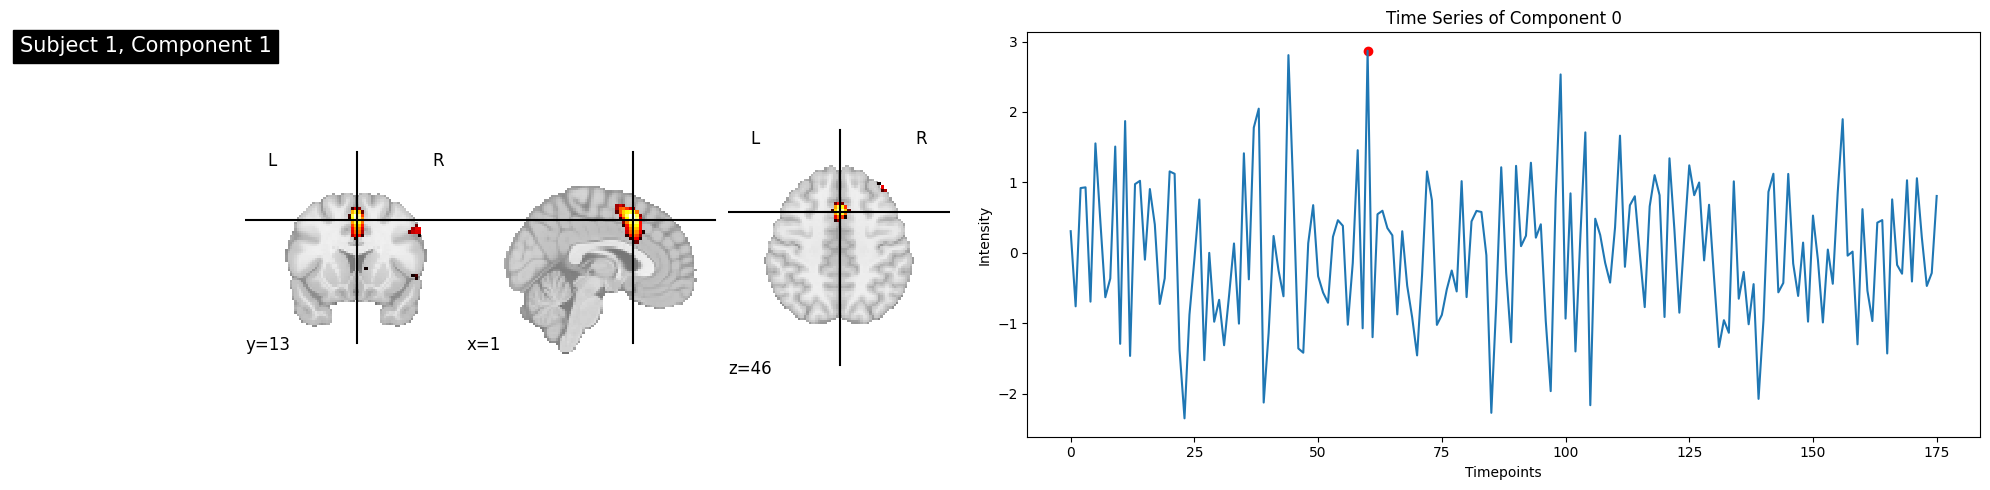

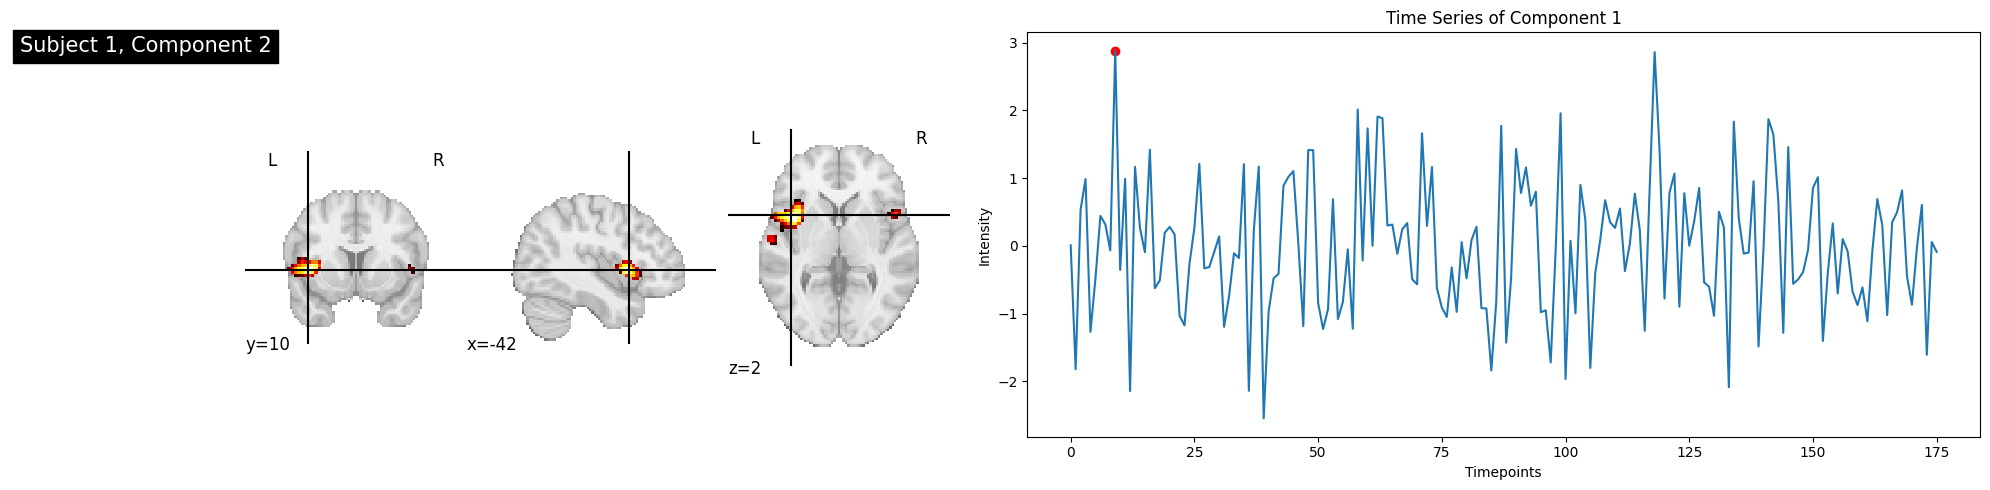

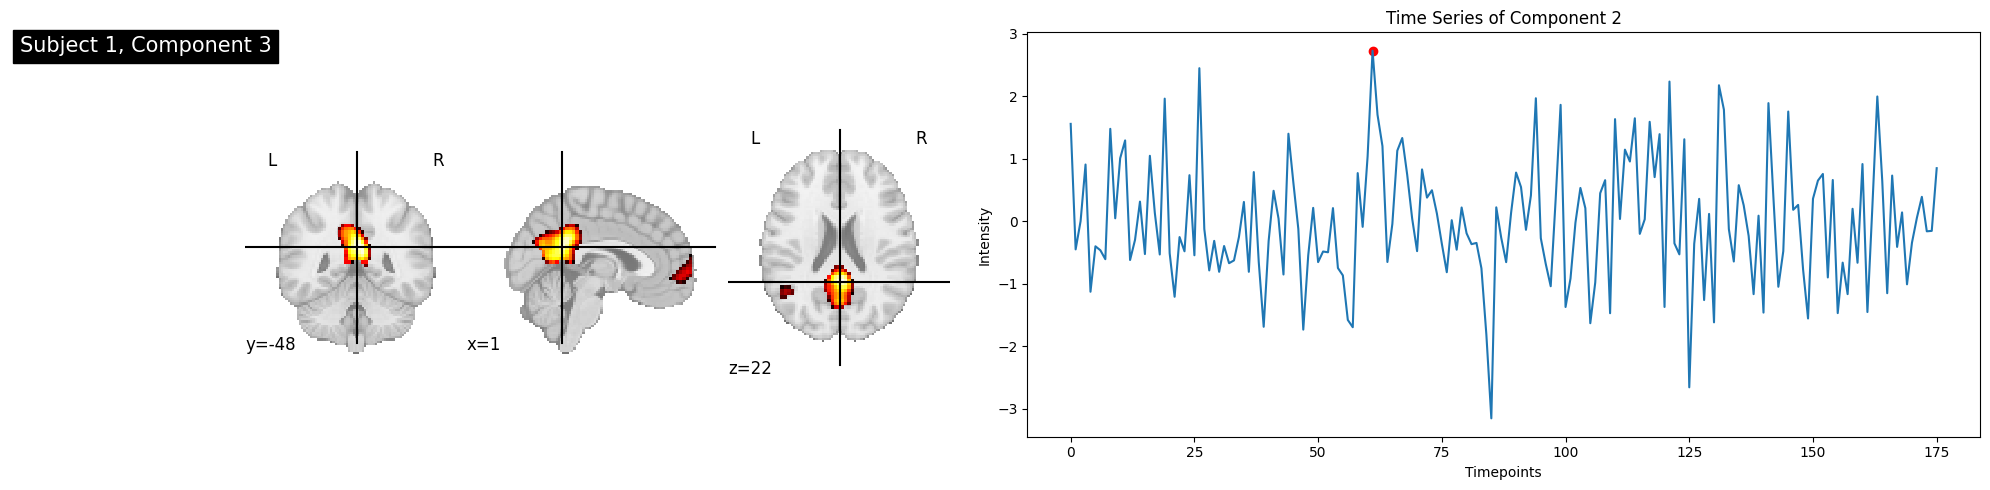

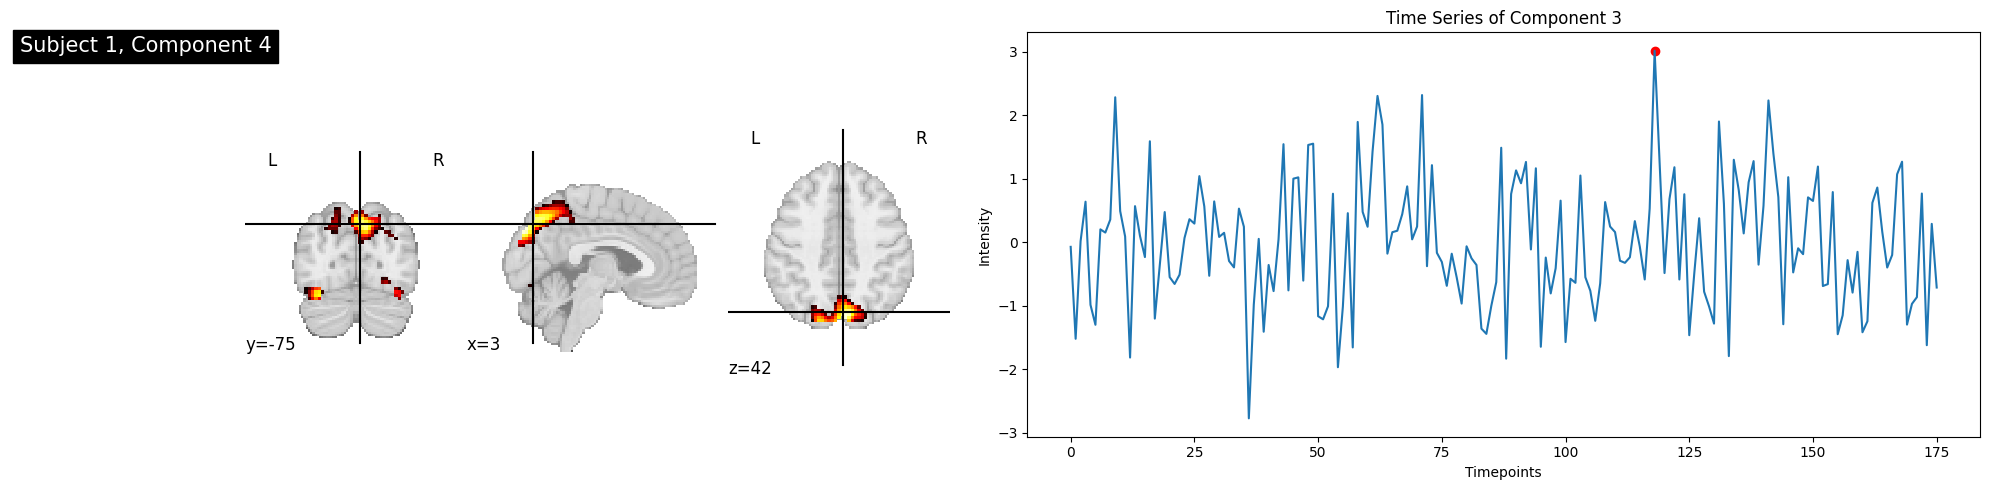

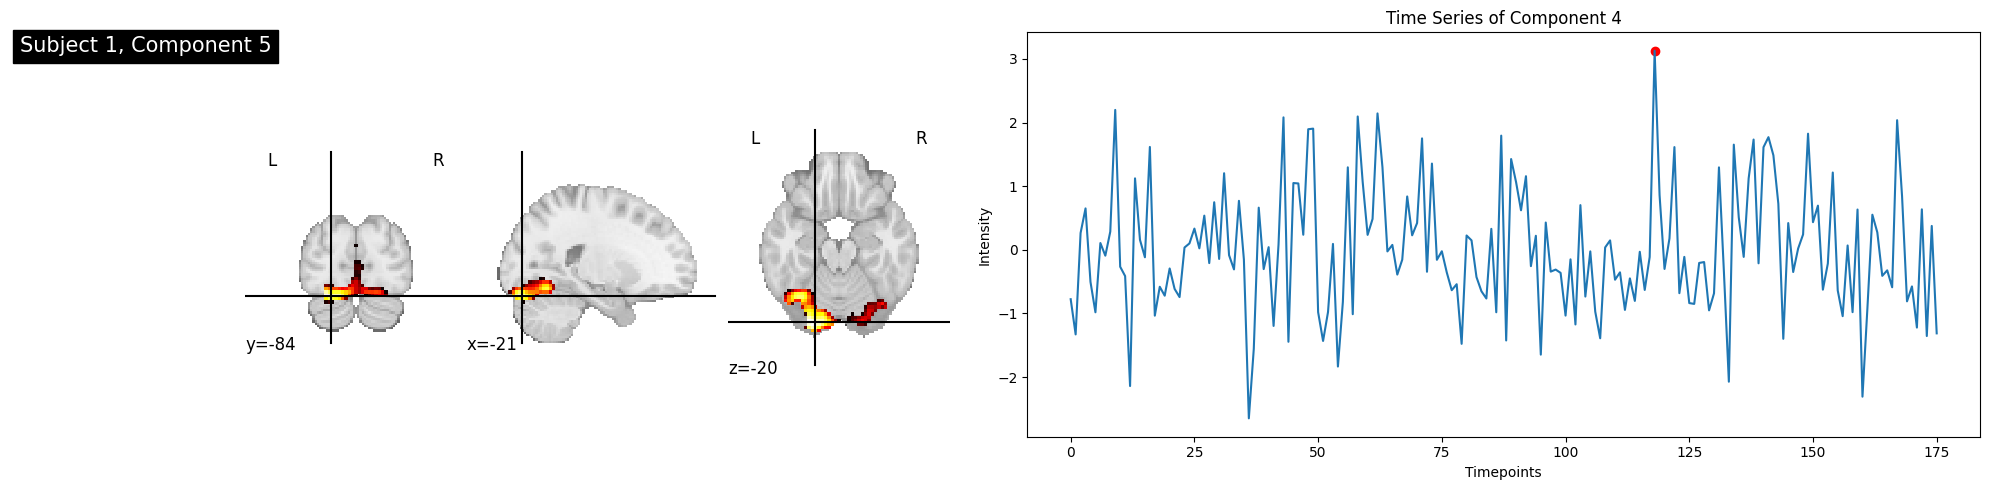

In [20]:
from nilearn.input_data import NiftiMasker
from nilearn.datasets import fetch_adhd
from nilearn.decomposition import DictLearning
from nilearn.plotting import plot_stat_map, find_xyz_cut_coords
from nilearn.image import index_img
from nilearn.masking import compute_epi_mask
import matplotlib.pyplot as plt
import os

class MyFMRClass:
    """Analyze ADHD dataset using dictionary learning."""

    def __init__(self, n_subjects=1):
        """
        Initialize the MyFMRClass class.

        Parameters:
        - n_subjects (int): Number of subjects to fetch from the dataset.
        """
        self.adhd_dataset = fetch_adhd(n_subjects=n_subjects)
        self.mask_img = compute_epi_mask(self.adhd_dataset.func[0])

    def preprocess_data(self):
        """Preprocess the functional MRI data."""
        masker = NiftiMasker(mask_img=self.mask_img, standardize=True)
        self.func_data_cleaned = masker.fit_transform(self.adhd_dataset.func[0],
                                                      confounds=self.adhd_dataset.confounds[0])

    def apply_dictionary_learning(self):
        """Apply Dictionary Learning on the preprocessed data."""
        self.dict_learn = DictLearning(
            n_components=5,
            n_epochs=1,
            alpha=10,
            reduction_ratio='cd',
            random_state=0,
            batch_size=5,
            method='cd',
            mask=self.mask_img,
            smoothing_fwhm=10,
            standardize='zscore_sample',
            detrend=True,
            mask_strategy='epi',
            n_jobs=1,
            verbose=1
        )

        self.dict_learn.fit(self.adhd_dataset.func[0], confounds=self.adhd_dataset.confounds[0])
        self.components_img = self.dict_learn.components_img_

    def visualize_components(self, output_dir='component_images'):
        """Visualize and save brain components and their time series."""
        os.makedirs(output_dir, exist_ok=True)

        for comp in range(5):
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

            # Brain component visualization
            comp_img = index_img(self.components_img, comp)
            title = f'Subject 1, Component {comp+1}'
            x_coord, y_coord, z_coord = find_xyz_cut_coords(comp_img)
            plot_stat_map(comp_img, title=title, display_mode='ortho', colorbar=False,
                          cut_coords=(x_coord, y_coord, z_coord), axes=ax1)

            # Time series visualization
            time_series = self.func_data_cleaned[:, comp]
            max_int_timepoint = np.argmax(time_series)
            ax2.plot(time_series)
            ax2.scatter(max_int_timepoint, time_series[max_int_timepoint], color='red')
            ax2.set(title=f'Time Series of Component {comp}', xlabel='Timepoints', ylabel='Intensity')

            plt.tight_layout()
            plt.show()

if __name__ == "__main__":
    analyzer = MyFMRClass(n_subjects=1)
    analyzer.preprocess_data()
    analyzer.apply_dictionary_learning()
    analyzer.visualize_components()
